# Scrub Global Temperature File All Years (Min/Max)
### Note: Temperatures are in Celsius

In [1]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# File to Load
temp_data = "../Data/GlobalTemperatures.csv"

# Read Temperature Data
temp_data_df = pd.read_csv(temp_data)
temp_data_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Create Dataset with Columns "dt", "LandAndOceanAverageTemperature", And "LandAndOceanAverageTemperatureUncertainty"
temp_data_df = temp_data_df[["dt", "LandAndOceanAverageTemperature"]]

# Drop rows with NaN
temp_data_df = temp_data_df.dropna()
temp_data_df.head()

,dt,LandAndOceanAverageTemperature
1200,1850-01-01,12.833
1201,1850-02-01,13.588
1202,1850-03-01,14.043
1203,1850-04-01,14.667
1204,1850-05-01,15.507


In [4]:
# Disable the SettingWithCopyWarning warning
pd.options.mode.chained_assignment = None

# Create a Year Column
temp_data_df["Year"] = temp_data_df["dt"].str[:4]

# Create another temp. column for min or max number
temp_data_df["Min/Avg/Temp"] = temp_data_df["LandAndOceanAverageTemperature"]

# Convert dt to datetime format
temp_data_df["dt"] = pd.to_datetime(temp_data_df["dt"])
temp_data_df.head()

,dt,LandAndOceanAverageTemperature,Year,Min/Avg/Temp
1200,1850-01-01,12.833,1850,12.833
1201,1850-02-01,13.588,1850,13.588
1202,1850-03-01,14.043,1850,14.043
1203,1850-04-01,14.667,1850,14.667
1204,1850-05-01,15.507,1850,15.507


In [5]:
# Group by Year and get average of both numerical columns
#temp_data_3 = temp_data_2.groupby('Year').min('Min Avg Temp').max('LandAndOceanAverageTemperature').reset_index()
temp_data_df = temp_data_df.groupby("Year").agg({"Min/Avg/Temp" : "min", "LandAndOceanAverageTemperature" : "max"})[["Min/Avg/Temp", "LandAndOceanAverageTemperature"]].reset_index()
temp_data_df.rename(columns = {"LandAndOceanAverageTemperature" : "Min/Avg/Temp"}, inplace = True)
temp_data_df.head()

# Save Data As CSV
temp_data_df.to_csv(r"../Data/temp_data-AllYears-Min-Max.csv", index = False, header = True)

In [6]:
# Convert Values Into Array
X = temp_data_df.iloc[:, 1].values.reshape(-1, 1)

# Calculate Dimension Of Rows
Y = temp_data_df.iloc[:, 2].values.reshape(-1, 1)

# Create Object For Class
linear_regressor = LinearRegression()

# Perform Linear Regression
linear_regressor.fit(X, Y)

# Make Predictions
Y_pred = linear_regressor.predict(X)

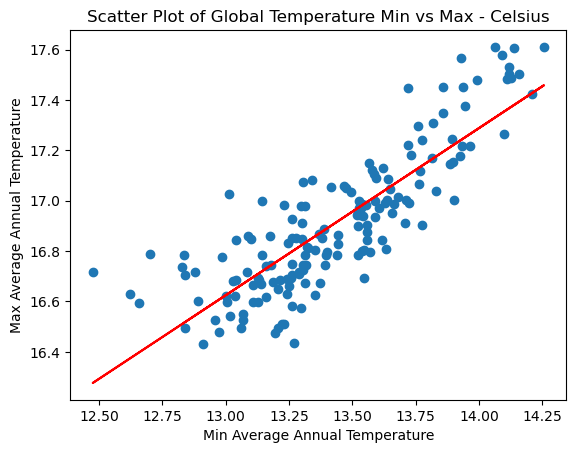

In [7]:
#Plot 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color = "red")
plt.xlabel("Min Average Annual Temperature")
plt.ylabel("Max Average Annual Temperature")
plt.title("Scatter Plot of Global Temperature Min vs Max - Celsius")
fig1 = plt.gcf()
fig1.savefig("../Images/Min_Max_Temp_scatter.png", bbox_inches = "tight")